In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
student=pd.read_csv('Cleaned_Dataset.csv')
print(student)

      Unnamed: 0  Age  Gender                         Stream  Internships  \
0              0   22    Male  Electronics And Communication            1   
1              1   21  Female               Computer Science            0   
2              2   22  Female         Information Technology            1   
3              3   21    Male         Information Technology            0   
4              4   22    Male                     Mechanical            0   
...          ...  ...     ...                            ...          ...   
2494        2494   23    Male         Information Technology            0   
2495        2495   23    Male                     Mechanical            1   
2496        2496   22    Male         Information Technology            1   
2497        2497   22    Male               Computer Science            1   
2498        2498   23    Male                          Civil            0   

      CGPA  Hostel  HistoryOfBacklogs  PlacedOrNot  
0      8.0       1    

In [22]:
student.head()

,Unnamed: 0,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,0,22,Male,Electronics And Communication,1,8.0,1,1,1
1,1,21,Female,Computer Science,0,7.0,1,1,1
2,2,22,Female,Information Technology,1,6.0,0,0,1
3,3,21,Male,Information Technology,0,8.0,0,1,1
4,4,22,Male,Mechanical,0,8.0,1,0,1


In [23]:
student.shape

(2499, 9)

In [24]:
student['Gender']=student['Gender'].replace({'Male':0, 'Female':1})

C:\Users\user\AppData\Local\Temp\ipykernel_6408\2793030387.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student['Gender']=student['Gender'].replace({'Male':0, 'Female':1})


In [25]:
student.head()

,Unnamed: 0,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,0,22,0,Electronics And Communication,1,8.0,1,1,1
1,1,21,1,Computer Science,0,7.0,1,1,1
2,2,22,1,Information Technology,1,6.0,0,0,1
3,3,21,0,Information Technology,0,8.0,0,1,1
4,4,22,0,Mechanical,0,8.0,1,0,1


In [26]:
student['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [27]:
student['Stream'].replace({'Electronics And Communication':0,'Computer Science':1,'Information Technology':2,'Mechanical':3,
                     'Electrical':4,'Civil':5})

C:\Users\user\AppData\Local\Temp\ipykernel_6408\1287254991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student['Stream'].replace({'Electronics And Communication':0,'Computer Science':1,'Information Technology':2,'Mechanical':3,


0       0
1       1
2       2
3       2
4       3
       ..
2494    2
2495    3
2496    2
2497    1
2498    5
Name: Stream, Length: 2499, dtype: int64

In [28]:
student.head()

,Unnamed: 0,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,0,22,0,Electronics And Communication,1,8.0,1,1,1
1,1,21,1,Computer Science,0,7.0,1,1,1
2,2,22,1,Information Technology,1,6.0,0,0,1
3,3,21,0,Information Technology,0,8.0,0,1,1
4,4,22,0,Mechanical,0,8.0,1,0,1


In [29]:
Y = student['PlacedOrNot']
X = student.drop(['PlacedOrNot'],axis=1)

In [30]:
X

,Unnamed: 0,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,0,22,0,Electronics And Communication,1,8.0,1,1
1,1,21,1,Computer Science,0,7.0,1,1
2,2,22,1,Information Technology,1,6.0,0,0
3,3,21,0,Information Technology,0,8.0,0,1
4,4,22,0,Mechanical,0,8.0,1,0
...,...,...,...,...,...,...,...,...
2494,2494,23,0,Information Technology,0,7.0,0,0
2495,2495,23,0,Mechanical,1,7.0,1,0
2496,2496,22,0,Information Technology,1,7.0,0,0
2497,2497,22,0,Computer Science,1,7.0,0,0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [34]:
ohe = OneHotEncoder()
ohe.fit(X[['Gender','Stream','Hostel','HistoryOfBacklogs']])

OneHotEncoder()

Internships
0    0.444144
1    0.513011
2    0.792332
Name: PlacedOrNot, dtype: float64


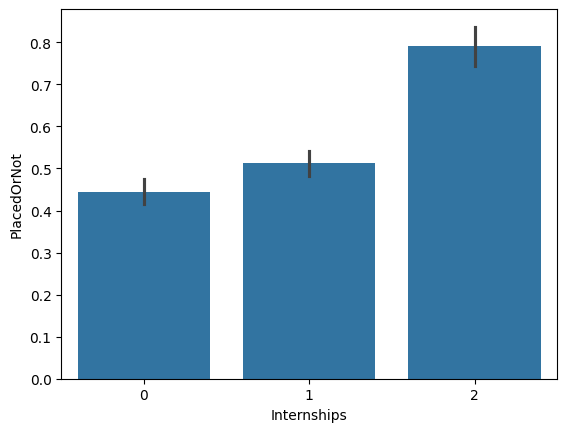

In [35]:
X_temp=X.copy()
X_temp['PlacedOrNot']=Y
print(X_temp.groupby('Internships')['PlacedOrNot'].mean())
sns.barplot(x="Internships",y="PlacedOrNot",data=student)
plt.savefig("plot 1.png")
plt.show()

CGPA
5.0    0.037037
6.0    0.180556
7.0    0.271951
8.0    1.000000
9.0    1.000000
Name: PlacedOrNot, dtype: float64


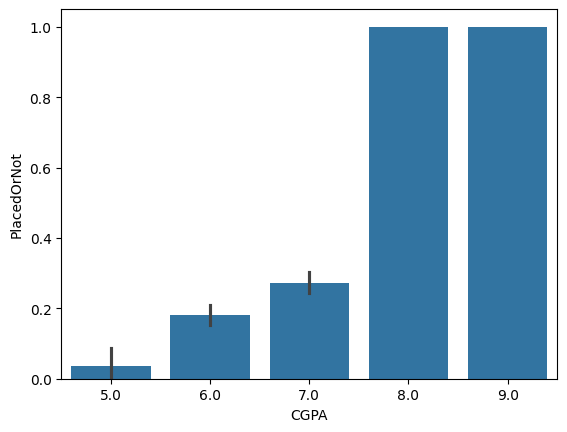

In [36]:
X_temp=X.copy()
X_temp['PlacedOrNot']=Y
print(X_temp.groupby('CGPA')['PlacedOrNot'].mean())
sns.barplot(x="CGPA",y="PlacedOrNot",data=student)
plt.savefig("plot 2.png")
plt.show()

Stream
Civil                            0.428044
Computer Science                 0.535545
Electrical                       0.526132
Electronics And Communication    0.560773
Information Technology           0.557627
Mechanical                       0.435393
Name: PlacedOrNot, dtype: float64


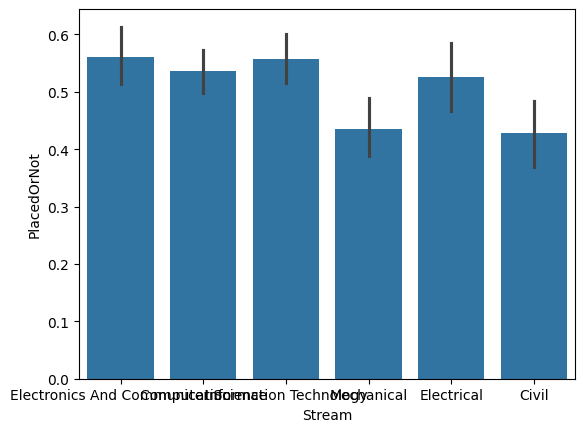

In [37]:
X_temp=X.copy()
X_temp['PlacedOrNot']=Y
print(X_temp.groupby('Stream')['PlacedOrNot'].mean())
sns.barplot(x="Stream",y="PlacedOrNot",data=student)
plt.savefig("plot 3.png")
plt.show()